In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import cross_val_score
from sklearn import neighbors, metrics

%matplotlib inline


# Let's start with Spam Data

In [3]:
url = "https://raw.githubusercontent.com/ga-students/DS-SF-24/master/Data/spambase.csv"
SpamData = pd.read_csv(url)

In [4]:
AllVariables = SpamData.columns.values

In [5]:
X = SpamData[AllVariables]

del X['is_spam']
X.shape  #You have 4601 inputs and 57 variables

(4601, 57)

In [6]:
clf = PCA(.99)  #use enough principle components to capture 99% of variability
X_trans = clf.fit_transform(X)
X_trans.shape #You have 4601 inputs and only 2 components!

(4601, 2)

In [7]:
y = SpamData['is_spam']

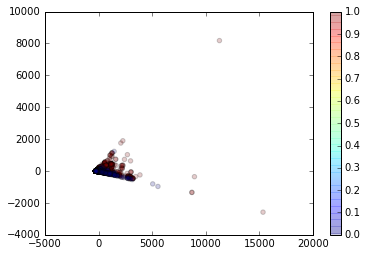

In [8]:
plt.scatter(X_trans[:, 0], X_trans[:, 1], c=y, alpha=0.2)
plt.colorbar()

In [9]:
lm = LogisticRegression()
lm.fit(X_trans,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [11]:
print(cross_val_score(lm,X_trans,y,cv=10).mean()) 
MisClassificationError = 1 - (cross_val_score(lm,X_trans,y,cv=10).mean())
print(MisClassificationError)  #our misclassification Error is 27 percent!

0.725943529979
0.274056470021


In [12]:
misclass =[]
for i in range(1,40):
    clf = PCA(i)  #i principle components
    X_trans = clf.fit_transform(X)
    MisClassificationError = 1 - (cross_val_score(lm, X_trans, y, cv=10).mean())
    misclass.append(MisClassificationError)
print(min(misclass))
print(np.argmin(misclass) + 1)

0.0852261506948
34


# Let's work with Digit data

In [13]:
from sklearn.datasets import load_digits

In [14]:
digits = load_digits()
X = digits.data
y = digits.target

In [15]:
print(digits.DESCR)

Optical Recognition of Handwritten Digits Data Set

Notes
-----
Data Set Characteristics:
    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an input matrix of 8x8 where each element is a

In [16]:
print(X.shape)
print(y)


(1797, 64)
[0 1 2 ..., 8 9 8]


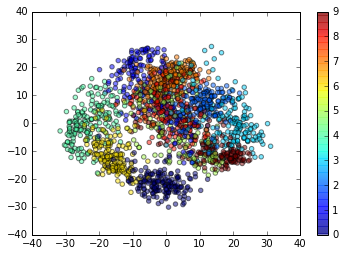

In [21]:
pca = PCA(2)
X_pc_handwriting = pca.fit_transform(X)
plt.scatter(X_pc_handwriting[:, 0], X_pc_handwriting[:, 1], c=y, alpha=0.5)
plt.colorbar();

In [22]:
misclass = []

for i in range(1,40):
    clf = PCA(i)
    X_trans = clf.fit_transform(X)
    knn = neighbors.KNeighborsClassifier(n_neighbors = 1, weights='uniform')
    knn.fit(X_trans,y)
    MisClassificationError = 1 - (cross_val_score(knn, X_trans, y, cv=10).mean())
    misclass.append(MisClassificationError)
    
print(min(misclass))
# We can achieve CV error rate of 1.99%! This is awesome! 

0.0199900610085


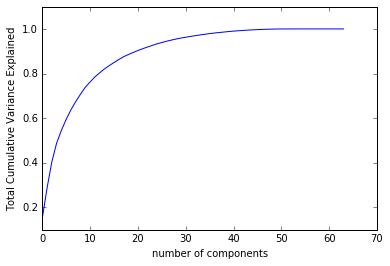

In [23]:
AllPCAs = PCA().fit(X)

plt.xlabel('number of components')
plt.ylabel('Total Cumulative Variance Explained')
plt.plot(np.cumsum(AllPCAs.explained_variance_ratio_))
plt.show()
# Number of components is what you see in the graph +1 ! (we could easily solve this)

# Some cool demonstrations!

Acknowledgment: This work is done by Prof. Jake VanderPlas - Director of Research in Physical Sciences for Univesity of Washington's eScience institute.

0 Axes(0.125,0.756481;0.143519x0.143519)
1 Axes(0.28287,0.756481;0.143519x0.143519)
2 Axes(0.440741,0.756481;0.143519x0.143519)
3 Axes(0.598611,0.756481;0.143519x0.143519)
4 Axes(0.756481,0.756481;0.143519x0.143519)
5 Axes(0.125,0.598611;0.143519x0.143519)
6 Axes(0.28287,0.598611;0.143519x0.143519)
7 Axes(0.440741,0.598611;0.143519x0.143519)
8 Axes(0.598611,0.598611;0.143519x0.143519)
9 Axes(0.756481,0.598611;0.143519x0.143519)
10 Axes(0.125,0.440741;0.143519x0.143519)
11 Axes(0.28287,0.440741;0.143519x0.143519)
12 Axes(0.440741,0.440741;0.143519x0.143519)
13 Axes(0.598611,0.440741;0.143519x0.143519)
14 Axes(0.756481,0.440741;0.143519x0.143519)
15 Axes(0.125,0.28287;0.143519x0.143519)
16 Axes(0.28287,0.28287;0.143519x0.143519)
17 Axes(0.440741,0.28287;0.143519x0.143519)
18 Axes(0.598611,0.28287;0.143519x0.143519)
19 Axes(0.756481,0.28287;0.143519x0.143519)
20 Axes(0.125,0.125;0.143519x0.143519)
21 Axes(0.28287,0.125;0.143519x0.143519)
22 Axes(0.440741,0.125;0.143519x0.143519)
23 Axes(0

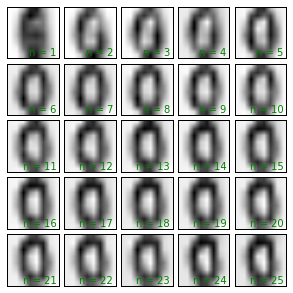

In [27]:
from sklearn.decomposition import PCA

fig, axes = plt.subplots(5, 5, figsize=(5, 5))
fig.subplots_adjust(hspace=0.1, wspace=0.1)

for i, ax in enumerate(axes.flat):
    pca = PCA(i + 1).fit(X)
    im = pca.inverse_transform(pca.transform(X[20:21]))
    ax.imshow(im.reshape((8, 8)), cmap='binary')
    ax.text(0.95, 0.05, 'n = {0}'.format(i + 1), ha='right',
            transform=ax.transAxes, color='green')
    ax.set_xticks([])
    ax.set_yticks([])

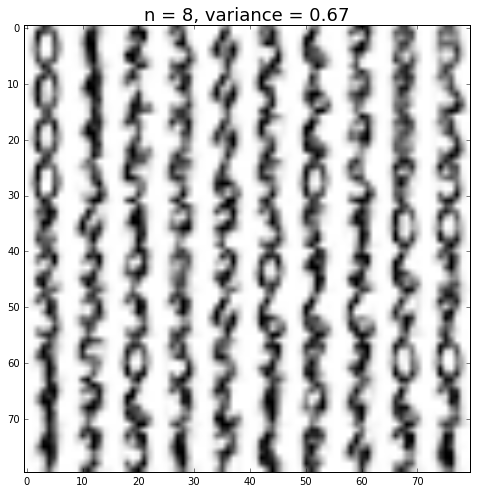

In [29]:

from IPython.html.widgets import interact
import matplotlib.pyplot as plt
%matplotlib inline
def plot_digits(n_components):
    plt.figure(figsize=(8, 8))
    nside = 10
    
    pca = PCA(n_components).fit(X)
    Xproj = pca.inverse_transform(pca.transform(X[:nside ** 2]))
    Xproj = np.reshape(Xproj, (nside, nside, 8, 8))
    total_var = pca.explained_variance_ratio_.sum()
    
    im = np.vstack([np.hstack([Xproj[i, j] for j in range(nside)])
                    for i in range(nside)])
    plt.imshow(im,cmap='Greys')
    plt.grid(False)
    plt.title("n = {0}, variance = {1:.2f}".format(n_components, total_var),
              size=18)
    plt.clim(0, 16)
    
interact(plot_digits, n_components=[1, 64], nside=[1, 8]);